<a href="https://colab.research.google.com/github/s-c-soma/AdvanceDataMining-CMPE-256/blob/main/assignments/CMPE256_Assignment_4_HierarchicalClustering(Agglomerative).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment: Hierarchical Clustering(Agglomerative)

In [12]:
import numpy as np

X = np.array ([
[3,7],
[2,6],
[2,2],
[5,8],
[5,5],
[5,2],
[6,6],
[8,4],
[7,3],
[10,6],
[12,8],])


## Compute Distance Matrix

In [14]:
import pandas as pd
from scipy.spatial import distance_matrix

data = [[3,7],
[2,6],
[2,2],
[5,8],
[5,5],
[5,2],
[6,6],
[8,4],
[7,3],
[10,6],
[12,8]]

names = [str(i) for i in range(1, len(data) +1)]

df = pd.DataFrame(data, columns=['xcord', 'ycord'], index=names)

In [15]:
 pd.DataFrame(distance_matrix(df.values, df.values), index=df.index, columns=df.index)

,1,2,3,4,5,6,7,8,9,10,11
1,0.000000,1.414214,5.099020,2.236068,2.828427,5.385165,3.162278,5.830952,5.656854,7.071068,9.055385
2,1.414214,0.000000,4.000000,3.605551,3.162278,5.000000,4.000000,6.324555,5.830952,8.000000,10.198039
3,5.099020,4.000000,0.000000,6.708204,4.242641,3.000000,5.656854,6.324555,5.099020,8.944272,11.661904
4,2.236068,3.605551,6.708204,0.000000,3.000000,6.000000,2.236068,5.000000,5.385165,5.385165,7.000000
5,2.828427,3.162278,4.242641,3.000000,0.000000,3.000000,1.414214,3.162278,2.828427,5.099020,7.615773
6,5.385165,5.000000,3.000000,6.000000,3.000000,0.000000,4.123106,3.605551,2.236068,6.403124,9.219544
7,3.162278,4.000000,5.656854,2.236068,1.414214,4.123106,0.000000,2.828427,3.162278,4.000000,6.324555
8,5.830952,6.324555,6.324555,5.000000,3.162278,3.605551,2.828427,0.000000,1.414214,2.828427,5.656854
9,5.656854,5.830952,5.099020,5.385165,2.828427,2.236068,3.162278,1.414214,0.000000,4.242641,7.071068
10,7.071068,8.000000,8.944272,5.385165,5.099020,6.403124,4.000000,2.828427,4.242641,0.000000,2.828427


In [ ]:
import math

x1 , y1 = (12,6)
x2 , y2 = (9,3)
dist = math.sqrt( (x2 - x1)**2 + (y2 - y1)**2 )
print("dist=", dist)

dist= 4.242640687119285


## Distance compute- for matrix

In [ ]:
num_list = [











[3,3]    
]
i =1
x2 , y2 = [3,6]

for x1, y1 in num_list:
  dist = math.sqrt( (x2 - x1)**2 + (y2 - y1)**2 )
  # print("i=", i , " dist= ", dist)
  print(dist)
  i += 1

3.0


## Plot Data Points

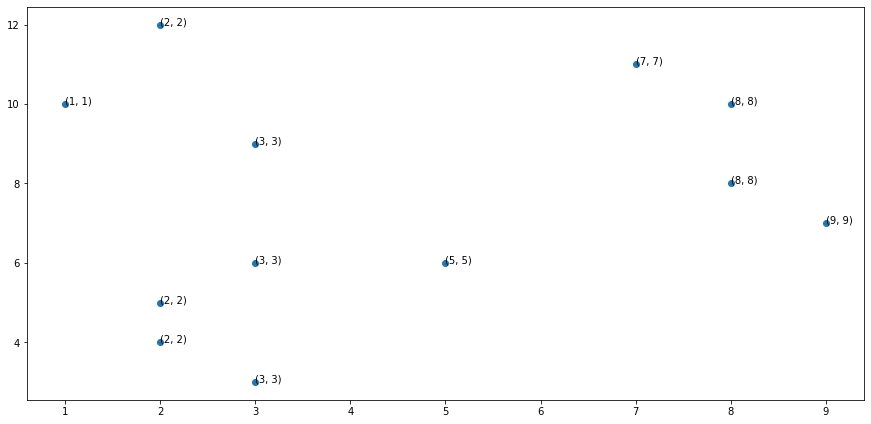

In [ ]:
import matplotlib.pyplot as plt
# x = [1,2,3,4]
# y = [1,4,9,16]
# plt.plot(x, y, 'ro')
# plt.axis([0, 6, 0, 20])
labels = range(1, 15)
plt.figure(figsize =(15, 7))
plt.subplots_adjust(bottom=0.1)
plt.scatter(X[:,0],X[:,1], label='True Position')

for label, x, y in zip(labels, X[:, 0], X[:, 1]):
    plt.text(x, y, '({}, {})'.format(x, x))

plt.show()

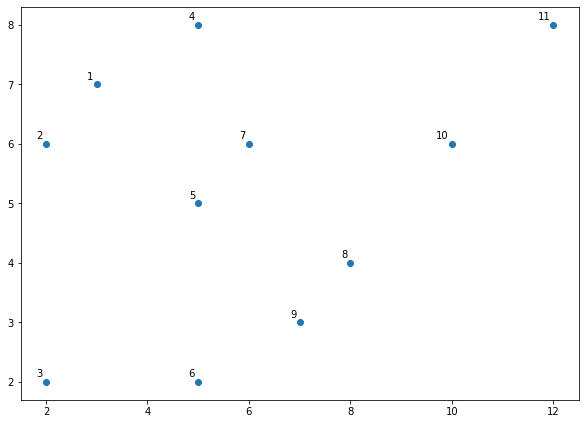

In [16]:
import matplotlib.pyplot as plt

labels = range(1, 13)
plt.figure(figsize =(10, 7))
plt.subplots_adjust(bottom=0.1)
plt.scatter(X[:,0],X[:,1], label='True Position')

for label, x, y in zip(labels, X[:, 0], X[:, 1]):
  plt.annotate( label, xy =(x, y), xytext= (-3, 3), textcoords='offset points', ha='right', va ='bottom')
plt.show()

## Single-link

n single link cluster n


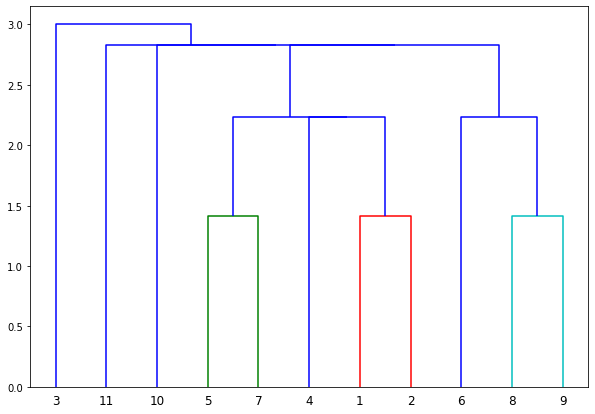

In [18]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

print ("n single link cluster n")
linked = linkage(X, 'single')
labelList = range(0,12)

plt.figure(figsize =(10, 7))
dendrogram(linked,orientation='top',labels= labelList, distance_sort = 'descending',show_leaf_counts = True)
plt.show()



## Complete-link

n complete link cluster n


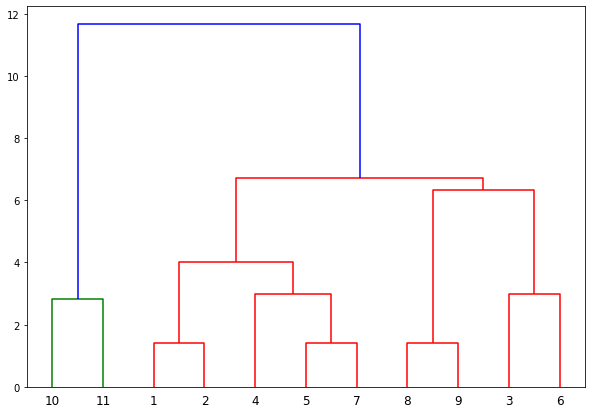

In [ ]:
print ("n complete link cluster n")
linked_complete= linkage(X, 'complete')
labelList = range(0,12)
plt.figure(figsize =(10, 7))
dendrogram(linked_complete,orientation='top',labels= labelList, distance_sort = 'descending',show_leaf_counts = True)
plt.show()

## Average-link

n average link cluster n


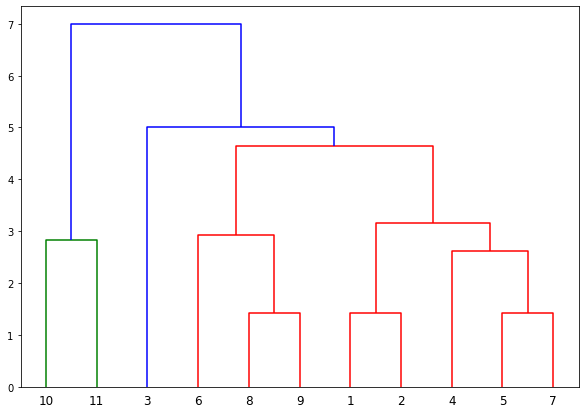

In [ ]:
print ("n average link cluster n")
linked_average= linkage(X, 'average')
labelList = range(0,12)
plt.figure(figsize =(10, 7))
dendrogram(linked_average,orientation='top',labels= labelList, distance_sort = 'descending',show_leaf_counts = True)
plt.show()

# Single-Link from Scratch

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
X = np.array ([
[3,7],
[2,6],
[2,2],
[5,8],
[5,5],
[5,2],
[6,6],
[8,4],
[7,3],
[10,6],
[12,8]
])

## Cluster Distance Computation

In [9]:
class Distance_computation_grid(object):
    '''
        class to enable the Computation of distance matrix 
    '''
    def __init__(self):
        pass
    
    def compute_distance(self,samples):
        '''
            Creates a matrix of distances between individual samples and clusters attained at a particular step
        '''
        Distance_mat = np.zeros((len(samples),len(samples)))
        for i in range(Distance_mat.shape[0]):
            for j in range(Distance_mat.shape[0]):
                if i!=j:
                    Distance_mat[i,j] = float(self.distance_calculate(samples[i],samples[j]))
                else:
                    Distance_mat[i,j] = 10**4
        return Distance_mat
    
    
    def distance_calculate(self,sample1,sample2):
        '''
            Distance calulated between two samples. The two samples can be both samples, both clusters or
            one cluster and one sample. If both of them are samples/clusters, then simple norm is used. In other 
            cases, we refer it as an exception case and pass the samples as parameter to some function that 
            calculates the necessary distance between cluster and a sample
        '''
        dist = []
        for i in range(len(sample1)):
            for j in range(len(sample2)):
                try:
                    dist.append(np.linalg.norm(np.array(sample1[i])-np.array(sample2[j])))
                except:
                    dist.append(self.intersampledist(sample1[i],sample2[j]))
        return min(dist)
    
    
    def intersampledist(self,s1,s2):
        '''
            To be used in case we have one sample and one cluster . It takes the help of one 
            method 'interclusterdist' to compute the distances between elements of a cluster(which are
            samples) and the actual sample given.
        '''
        if str(type(s2[0]))!='<class \'list\'>':
            s2=[s2]
        if str(type(s1[0]))!='<class \'list\'>':
            s1=[s1]
        m = len(s1)
        n = len(s2)
        dist = []
        if n>=m:
            for i in range(n):
                for j in range(m):
                    if (len(s2[i])>=len(s1[j])) and str(type(s2[i][0])!='<class \'list\'>'):
                        dist.append(self.interclusterdist(s2[i],s1[j]))
                    else:
                        dist.append(np.linalg.norm(np.array(s2[i])-np.array(s1[j])))
        else:
            for i in range(m):
                for j in range(n):
                    if (len(s1[i])>=len(s2[j])) and str(type(s1[i][0])!='<class \'list\'>'):
                        dist.append(self.interclusterdist(s1[i],s2[j]))
                    else:
                        dist.append(np.linalg.norm(np.array(s1[i])-np.array(s2[j])))
        return min(dist)
    
    def interclusterdist(self,cl,sample):
        if sample[0]!='<class \'list\'>':
            sample = [sample]
        dist   = []
        for i in range(len(cl)):
            for j in range(len(sample)):
                dist.append(np.linalg.norm(np.array(cl[i])-np.array(sample[j])))
        return min(dist)

## Implementing the cluster Method

In [10]:
progression = [[i] for i in range(X.shape[0])]
samples     = [[list(X[i])] for i in range(X.shape[0])]
m = len(samples)
distcal  = Distance_computation_grid()

while m>1:
    print('Sample size before clustering    :- ',m)
    Distance_mat      = distcal.compute_distance(samples)
    sample_ind_needed = np.where(Distance_mat==Distance_mat.min())[0]
    value_to_add      = samples.pop(sample_ind_needed[1])
    samples[sample_ind_needed[0]].append(value_to_add)
    
    print('Cluster Node 1                   :-',progression[sample_ind_needed[0]])
    print('Cluster Node 2                   :-',progression[sample_ind_needed[1]])
    
    progression[sample_ind_needed[0]].append(progression[sample_ind_needed[1]])
    progression[sample_ind_needed[0]] = [progression[sample_ind_needed[0]]]
    v = progression.pop(sample_ind_needed[1])
    m = len(samples)
    
    print('Progression(Current Sample)      :-',progression)
    print('Cluster attained                 :-',progression[sample_ind_needed[0]])
    print('Sample size after clustering     :-',m)
    print('\n')

Sample size before clustering    :-  11
Cluster Node 1                   :- [0]
Cluster Node 2                   :- [1]
Progression(Current Sample)      :- [[[0, [1]]], [2], [3], [4], [5], [6], [7], [8], [9], [10]]
Cluster attained                 :- [[0, [1]]]
Sample size after clustering     :- 10


Sample size before clustering    :-  10
Cluster Node 1                   :- [4]
Cluster Node 2                   :- [6]
Progression(Current Sample)      :- [[[0, [1]]], [2], [3], [[4, [6]]], [5], [7], [8], [9], [10]]
Cluster attained                 :- [[4, [6]]]
Sample size after clustering     :- 9


Sample size before clustering    :-  9
Cluster Node 1                   :- [7]
Cluster Node 2                   :- [8]
Progression(Current Sample)      :- [[[0, [1]]], [2], [3], [[4, [6]]], [5], [[7, [8]]], [9], [10]]
Cluster attained                 :- [[7, [8]]]
Sample size after clustering     :- 8


Sample size before clustering    :-  8
Cluster Node 1                   :- [[0, [1]]]
Cl

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


IndexError: ignored

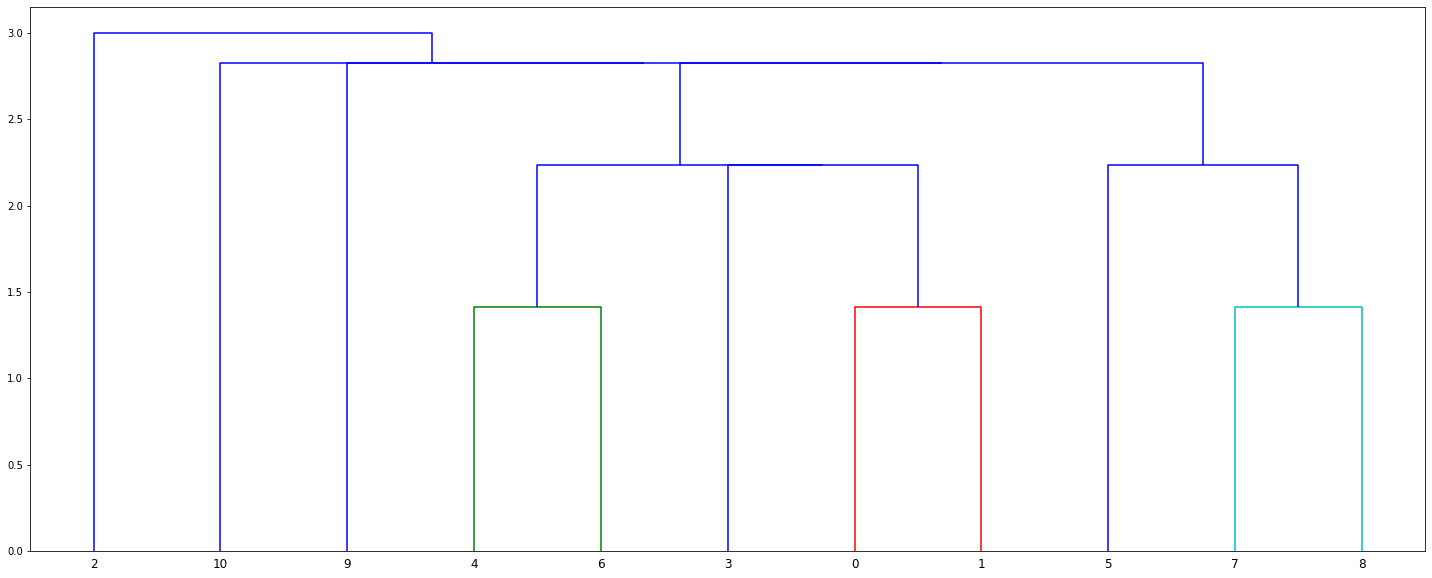

In [11]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
Z = linkage(X, 'single')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)